In [1]:
import sys
sys.path.append("/mnt/nas05/data01/francesco/progetto_simone/ionosphere")
from src.data.dataset import IonoDataset


WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.6.0+cu124 with CUDA 1204 (you have 2.6.0+cu118)
    Python  3.10.16 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
/mnt/nas05/data01/francesco/progetto_simone/ionosphere/src/vit.py:26: FutureWarning: xformers.components is deprecated and is not maintained anymore. It might be removed in a future version of xFormers 
  import xformers.components.attention.core as xfa


In [2]:
import numpy as np

gen_data = np.load("/mnt/nas05/data01/francesco/progetto_simone/ionosphere/np_generated_data/sample.npy")
org_data = np.load("/mnt/nas05/data01/francesco/progetto_simone/ionosphere/np_generated_data/original.npy")
cond_data = np.load("/mnt/nas05/data01/francesco/progetto_simone/ionosphere/np_generated_data/cond.npy")

In [3]:
gen_data.shape

(100, 1, 24, 360)

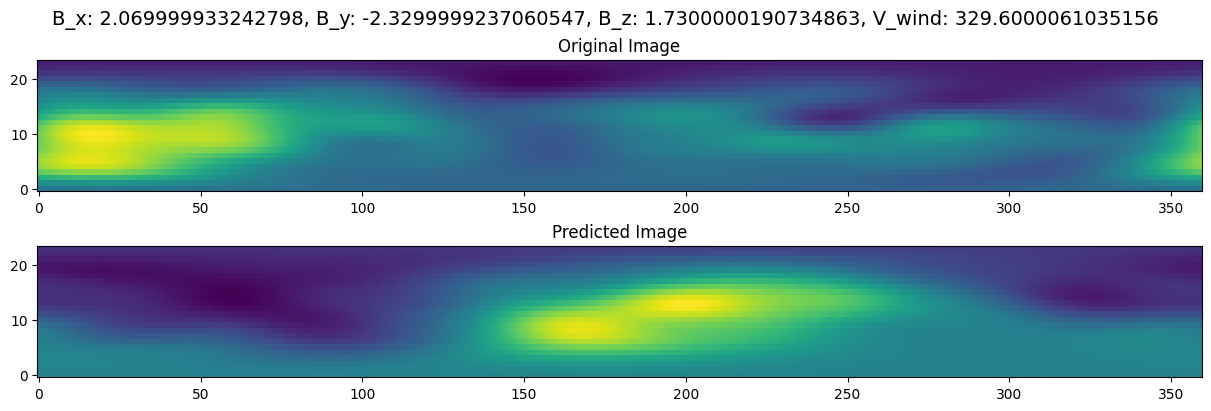

In [12]:
import random

target_tensor = gen_data[random.randint(0, 100)][0] #
# Use a wide figure to match the (24, 360) data shape
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), constrained_layout=True)

# Plot the original image
ax1.imshow(org_data, origin='lower', aspect='auto')
ax1.set_title('Original Image')

# Plot the predicted image
ax2.imshow(target_tensor, origin='lower', aspect='auto')
ax2.set_title('Predicted Image')

# Add a big title
fig.suptitle('B_x: {}, B_y: {}, B_z: {}, V_wind: {}'.format(cond_data[0], cond_data[1], cond_data[2], -cond_data[3]),
             fontsize=14)

plt.show()

In [7]:
import torch

# def inverse_normalize(tensor, mean, std):
#     mean = torch.tensor(mean, device=tensor.device).view(-1, 1, 1)
#     std = torch.tensor(std, device=tensor.device).view(-1, 1, 1)
#     return tensor * std + mean

# original_data = inverse_normalize(torch.from_numpy(org_data), mean=[-1385.47], std=[7235.46])
# predictd_data = inverse_normalize(torch.from_numpy(gen_data), mean=[-1385.47], std=[7235.46])

original_data = torch.from_numpy(org_data) * 108154.0
predictd_data = torch.from_numpy(gen_data) * 108154.0



In [10]:
torch.max(original_data)
torch.min(original_data)
print(f'Diff: {torch.max(original_data) - torch.min(original_data)}')

Diff: 15034.33984375


In [18]:
original_data.shape

torch.Size([24, 360])

In [20]:
predictd_data.shape

torch.Size([50, 1, 24, 360])

In [11]:
torch.max(predictd_data[4][0])
torch.min(predictd_data[4][0])
print(f'Diff: {torch.max(predictd_data[4][0]) - torch.min(predictd_data[4][0])}')

Diff: 34534.79296875


In [23]:
torch.std(predictd_data, dim=0)[0].numpy().shape

(24, 360)

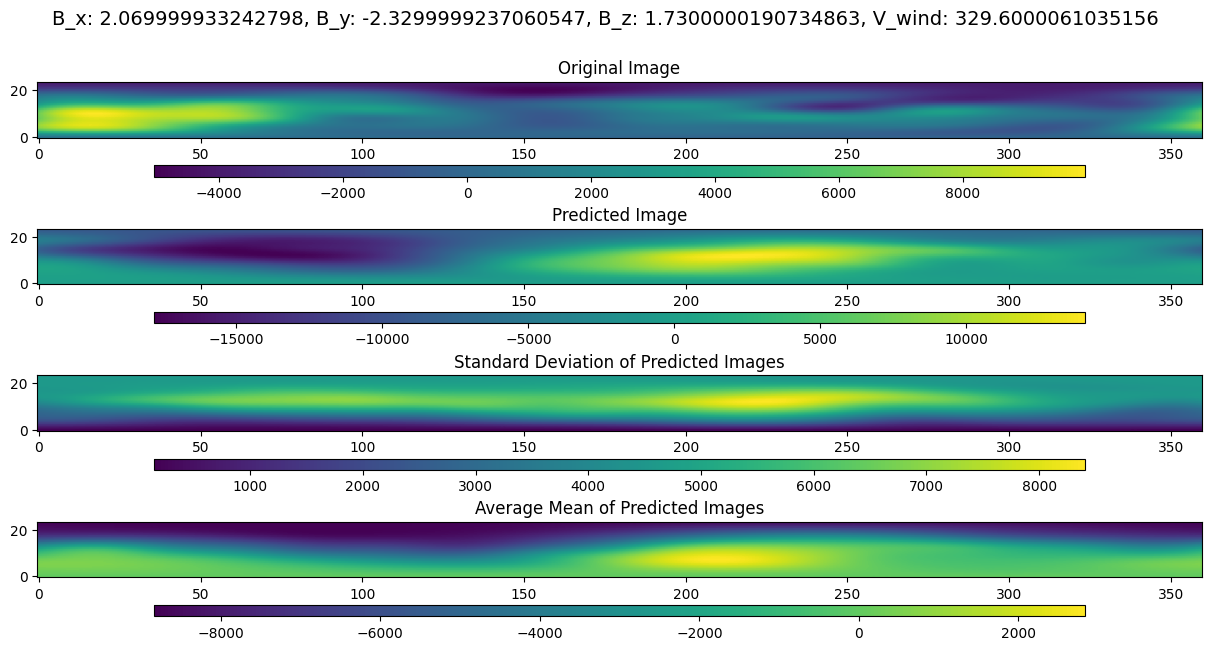

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create figure with vertical stacking
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 6), constrained_layout=True, gridspec_kw={'hspace': 0.3} )

# Plot the original image
im1 = ax1.imshow(original_data.numpy(), origin='lower', aspect='auto')
ax1.set_title('Original Image')

# Add horizontal colorbar under ax1
cax1 = inset_axes(ax1,
                  width="80%",  # width relative to ax1
                  height="20%",  # height in %
                  loc='lower center',
                  bbox_to_anchor=(0, -0.7, 1, 1),
                  bbox_transform=ax1.transAxes,
                  borderpad=0)
plt.colorbar(im1, cax=cax1, orientation='horizontal')

# Plot the predicted image
im2 = ax2.imshow(predictd_data[random.randint(0, 100)][0].numpy(), origin='lower', aspect='auto')
ax2.set_title('Predicted Image')

# Add horizontal colorbar under ax2
cax2 = inset_axes(ax2,
                  width="80%",
                  height="20%",
                  loc='lower center',
                  bbox_to_anchor=(0, -0.7, 1, 1),
                  bbox_transform=ax2.transAxes,
                  borderpad=0)
plt.colorbar(im2, cax=cax2, orientation='horizontal')

# Plot the predicted image
im3 = ax3.imshow(torch.std(predictd_data, dim=0)[0].numpy(), origin='lower', aspect='auto')
ax3.set_title('Standard Deviation of Predicted Images')

# Add horizontal colorbar under ax2
cax3 = inset_axes(ax3,
                  width="80%",
                  height="20%",
                  loc='lower center',
                  bbox_to_anchor=(0, -0.7, 1, 1),
                  bbox_transform=ax3.transAxes,
                  borderpad=0)
plt.colorbar(im3, cax=cax3, orientation='horizontal')

im4 = ax4.imshow(torch.mean(predictd_data, dim=0)[0].numpy(), origin='lower', aspect='auto')
ax4.set_title('Average Mean of Predicted Images')

# Add horizontal colorbar under ax2
cax4 = inset_axes(ax4,
                  width="80%",
                  height="20%",
                  loc='lower center',
                  bbox_to_anchor=(0, -0.7, 1, 1),
                  bbox_transform=ax4.transAxes,
                  borderpad=0)
plt.colorbar(im4, cax=cax4, orientation='horizontal')

# Add a big title
fig.suptitle(
    f'B_x: {cond_data[0]}, B_y: {cond_data[1]}, B_z: {cond_data[2]}, V_wind: {-cond_data[3]}\n',
    # f'Diff_original = {torch.max(original_data) - torch.min(original_data):.2f}, '
    # f'Diff_pred = {torch.max(predictd_data) - torch.min(predictd_data):.2f}',
    fontsize=14
)

plt.show()



In [28]:
predictd_data.shape


torch.Size([100, 1, 24, 360])

In [32]:
data.shape

(24, 360)

/tmp/ipykernel_200891/3303176331.py:39: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c1 = axs[0].pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='plasma')
/tmp/ipykernel_200891/3303176331.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c2 = axs[1].pcolormesh(theta_grid, r_grid, grid_values_pred, shading='auto', cmap='plasma')
/tmp/ipykernel_200891/3303176331.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c3 = axs[2].pcolormesh(theta_grid, r_grid, grid_values_std, shading='auto', cmap='plasma')


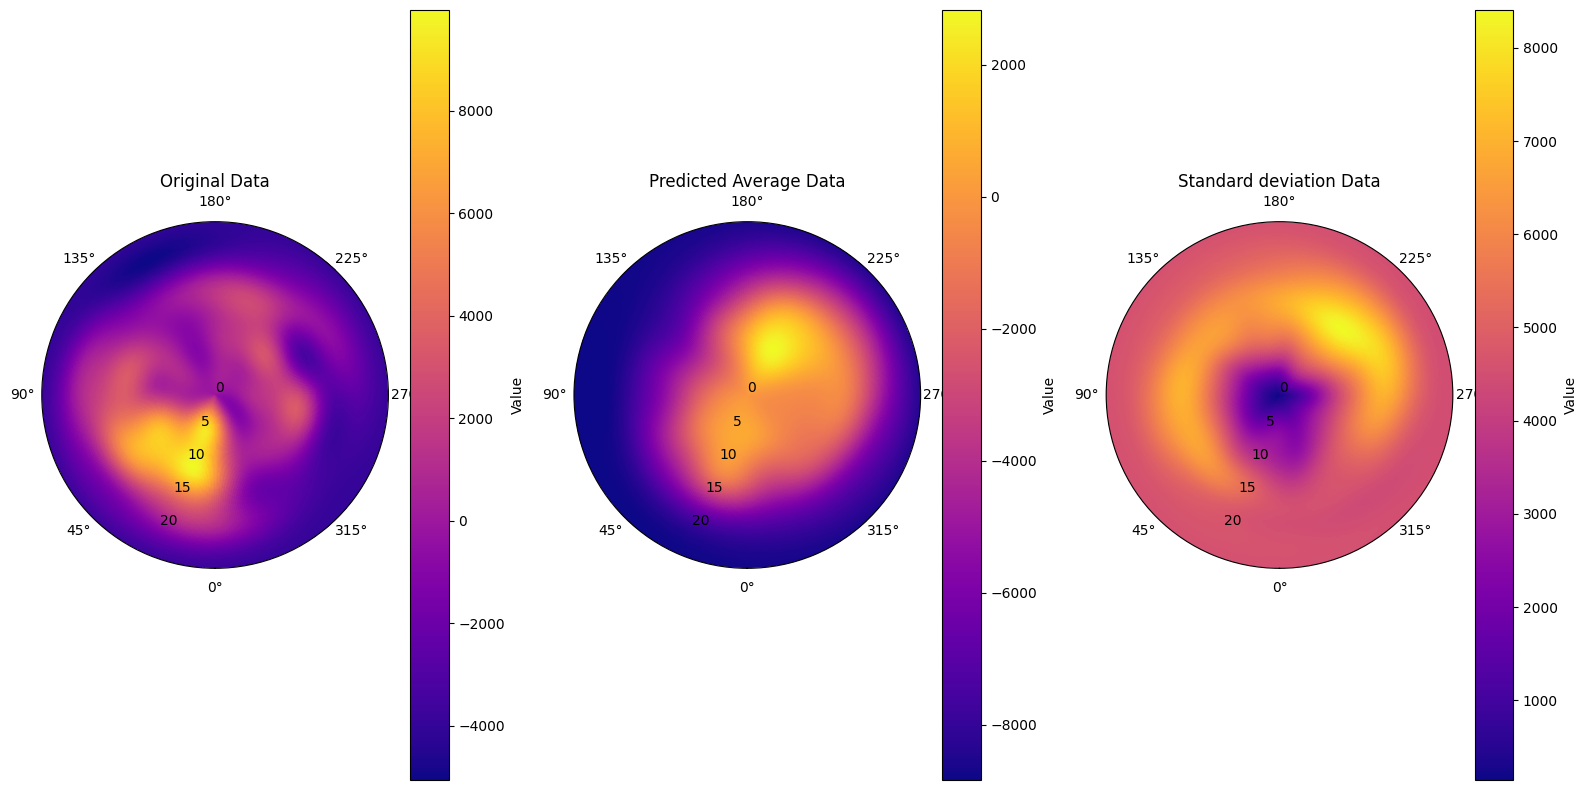

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Replace these with your actual data arrays
data = original_data.numpy()
data_pred = torch.mean(predictd_data, dim=0)[0].numpy()
data_std = torch.std(predictd_data, dim=0)[0].numpy()

# Define coordinates
mag_lat = np.linspace(-90, -66, data.shape[0])
mag_lon = np.linspace(0, 360, data.shape[1], endpoint=False)

# Create meshgrid from lat/lon
lon_grid, lat_grid = np.meshgrid(mag_lon, mag_lat)

# Convert to polar coordinates
r = 90 - np.abs(lat_grid.flatten())
theta = np.deg2rad(lon_grid.flatten())

# Interpolate onto regular polar grid
r_i = np.linspace(r.min(), r.max(), 200)
theta_i = np.linspace(0, 2 * np.pi, 360)
r_grid, theta_grid = np.meshgrid(r_i, theta_i)

# Interpolation for original data
points = np.column_stack((r, theta))
grid_values = griddata(points, data.flatten(), (r_grid, theta_grid), method='linear')

# Interpolation for predicted data
grid_values_pred = griddata(points, data_pred.flatten(), (r_grid, theta_grid), method='linear')

grid_values_std = griddata(points, data_std.flatten(), (r_grid, theta_grid), method='linear')

# Plot polar figures side by side
fig, axs = plt.subplots(1, 3, figsize=(16, 8), subplot_kw=dict(polar=True))

# Original data
c1 = axs[0].pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='plasma')
axs[0].set_theta_zero_location("S")
axs[0].set_theta_direction(-1)
fig.colorbar(c1, ax=axs[0], label='Value')
axs[0].set_title("Original Data")

# Predicted data
c2 = axs[1].pcolormesh(theta_grid, r_grid, grid_values_pred, shading='auto', cmap='plasma')
axs[1].set_theta_zero_location("S")
axs[1].set_theta_direction(-1)
fig.colorbar(c2, ax=axs[1], label='Value')
axs[1].set_title("Predicted Average Data")

c3 = axs[2].pcolormesh(theta_grid, r_grid, grid_values_std, shading='auto', cmap='plasma')
axs[2].set_theta_zero_location("S")
axs[2].set_theta_direction(-1)
fig.colorbar(c3, ax=axs[2], label='Value')
axs[2].set_title("Standard deviation Data")

plt.tight_layout()
plt.show()



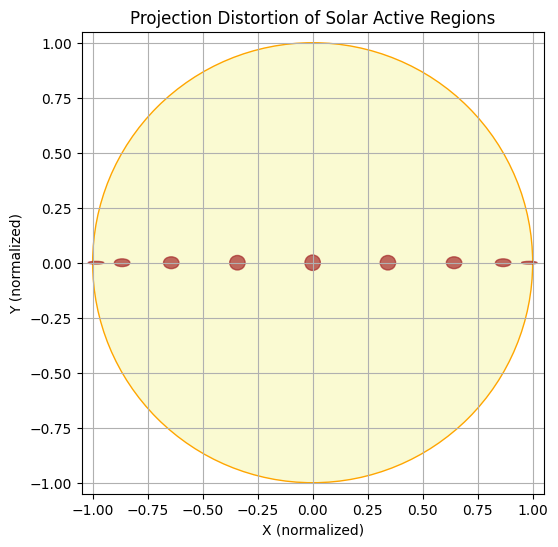

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def sunspot_projection(lat_deg, lon_deg):
    # Convert degrees to radians
    lat = np.radians(lat_deg)
    lon = np.radians(lon_deg)

    # Sphere to Cartesian
    x = np.cos(lat) * np.sin(lon)
    y = np.sin(lat)
    z = np.cos(lat) * np.cos(lon)

    if z < 0:
        return None  # behind the limb

    return x, y, z

def plot_distorted_spots():
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')
    ax.set_xlim(-1.05, 1.05)
    ax.set_ylim(-1.05, 1.05)
    ax.set_title("Projection Distortion of Solar Active Regions")

    # Plot solar disk
    disk = plt.Circle((0, 0), 1.0, color='lightgoldenrodyellow', ec='orange')
    ax.add_patch(disk)

    for lon in range(-80, 81, 20):  # Longitude across disk
        pos = sunspot_projection(lat_deg=0, lon_deg=lon)
        if pos:
            x, y, z = pos
            r_major = 0.07
            r_minor = 0.07 * np.sqrt(1 - (x**2 + y**2))  # foreshortening

            e = Ellipse((x, y), width=r_major, height=r_minor, color='brown', alpha=0.7)
            ax.add_patch(e)

    ax.set_xlabel("X (normalized)")
    ax.set_ylabel("Y (normalized)")
    plt.grid(True)
    plt.show()

plot_distorted_spots()
